In [14]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.preprocessing import StandardScaler


In [19]:
data = pd.read_csv('/Users/Matt/Documents/Intro To Stat Learning/MachineLearningFromScratch/data/Advertising.csv')
#df = data[['Income','Rating','Balance']]


data.drop('Unnamed: 0', axis=1, inplace=True)
data


y = data['sales']
X = data.iloc[:,:-1]
standsc = StandardScaler()
standsc.fit(X)
X_norm = pd.DataFrame(standsc.transform(X))
X_norm.columns = X.columns

In [20]:
def addConstantFunc(X):

    x0 = np.ones(len(X))

    #add a constant
    X['constant'] = x0

    return X


def calculate_cost_function(X,y, coefficients):



    #add a constant
    X =  addConstantFunc(X)

    cost = np.sum((X.dot(coefficients) - y)**2)/ (2*len(y))

    return cost


def LinearRegression(X,y, alpha, n_iterations, step_loss = True):

    """
    if step loss is true, the function returns the gradient descent output


    """
    X_ = addConstantFunc(X)

    gradient_preds = []

    #create base intercept
    coefficients = np.array(np.zeros(X_.shape[1]))

    cost_history = [0] * n_iterations

    for i in range(n_iterations):

        h = X_.dot(coefficients)

        loss = h - y

        gradient = X_.T.dot(loss)/ len(y)

        coefficients = coefficients - alpha  * gradient

        cost = calculate_cost_function(X_,y, coefficients)

        gradient_preds.append(tuple([i, cost]))

        cost_history[i] = cost

        steploss = pd.DataFrame(gradient_preds,columns=['Steps','Loss'])



    if step_loss==True:
        return (coefficients, cost_history)

    else:
        return coefficients


def predict(X, coefficients):

    X = addConstantFunc(X)
    prediction = X.dot(coefficients)
    return prediction

In [22]:
coeff  = LinearRegression(X_norm, y, 0.001, 1000, step_loss=False)

coeff

TV           2.520906
radio        1.762303
newspaper    0.425921
constant     8.866491
dtype: float64

In [24]:
predictions = predict(X_norm, coeff)

In [26]:
Results =pd.DataFrame({'Prediction':predictions,'Actuals':y})

In [27]:
Results.reset_index(inplace=True)
Results.drop('index',axis=1,inplace=True)

(0, 200)

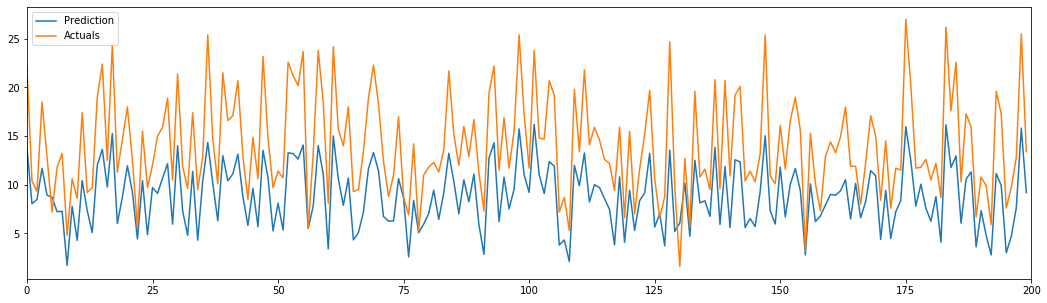

In [28]:
Results.plot(figsize=(18,5))
plt.xlim(0,200)

In [22]:
Results['Error'] = (Results['Prediction'] - Results['Actuals'])**2

In [23]:
Results['Error'].mean()

0.6474981436913988

In [24]:
coeff

MedInc       0.424483
HouseAge     0.016824
AveBedrms    0.003540
AveRooms    -0.015605
constant     0.023282
dtype: float64